## Laboratorio N° 01: Crear un reporte asociado a los datos de negocio
 ## Nombre: Arlyn Cotrado Coaquira
Basado en el conjunto de datos "credit data.csv"

Crear un reporte con la siguiente descripción:

- Periodo de analisis: de 2014 a 2015
- Unidad de Tiempo: Trimestral (y total anual)
- Grupos de analisis: Por ingreso mensual con grupos. 
    * menos de 2.500
    * 2.500 a 5.000
    * 5.000 a 10.000
    * mas de 10.000
- KPIs:
    - Número de Créditos
    - delincuencia promedio (porcentaje de clientes en morosidad de 90dpd)
    - ingreso mensual promedio
- Estructura de tabla:
    * cuartos en columnas
    * Grupos y KPIs en filas.
- Dibuja una gráfica con:
    - Barras apiladas para el número de créditos
    - Líneas para la morosidad media

Adicional, Analisis de Data Exploratorio:

- Crear un par gráfico de parejas para todas las variables
- Crear un gráfico con Ingresos VS Edad en el medio, más distribuciones marginales    

### 1. Import the data

While importing, be sure to take care of:  
    - variable format
    - missing values:
        * missing in MonthlyIncome must be filled with the median
        * missing in NumberOfDependents must be filled with 0
    - dates
    

In [0]:
# import libraries
import numpy as np
import pandas as pd
from numpy.random import rand
np.random.seed(101)
# to show figures directly inline
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('credit data.csv', sep=';')
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,17/09/2015
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,02/07/2016
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,13/04/2016
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,26/08/2016
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,18/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,15/10/2014
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,18/09/2014
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,15/02/2015
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,24/10/2014


In [5]:


# check types
df.dtypes



Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
cohort_date                              object
dtype: object

In [6]:
# check the dates are well loaded

df.count()



Id                                      150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
cohort_date                             150000
dtype: int64

### 2. Missing values inputation

In [7]:
# check missings

df.isnull().sum().sum()


33655

In [10]:

# missing imputation
df['MonthlyIncome'].isnull()




0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997     True
149998    False
149999    False
Name: MonthlyIncome, Length: 150000, dtype: bool

In [11]:

# check missings
df['MonthlyIncome'].isnull().sum()


29731

### 3. Select the data sample for the report

In [12]:
# filter by date
df['cohort_date'] = pd.to_datetime(df['cohort_date'])
filtro_date = '17-09-2016'
mask = (df['cohort_date'] > filtro_date)
df = df.loc[mask]
df




,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149921,149922,0,0.031838,67,0,1182.000000,NaN,5,0,1,0,0.0,2016-12-04
149924,149925,1,0.673699,62,1,3653.000000,NaN,16,0,1,0,1.0,2016-12-06
149928,149929,0,0.342069,45,0,0.251994,8900.0,14,0,1,0,4.0,2016-11-07
149966,149967,0,0.081930,57,0,0.337166,16000.0,15,0,2,0,0.0,2016-11-04


In [13]:

# checking
df['cohort_date'].count()

3612

### 4. Create intermediate variables

Hints: 
- use *.dt.year and *.dt.quarter for date columns and astype() to convert columns
- use pd.cut() method for binning a variable

In [17]:
# create quarter variable
df['year'] = pd.DatetimeIndex(df['cohort_date']).year
df.head()


# create income_groups variable




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,year
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06,2016
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06,2016
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01,2016
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01,2016
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04,2016


In [0]:
# check




,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,Quarter,Income Group
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2015-09-17,2015-3,Group 3
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,2015-11-18,2015-4,Group 4
6,7,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0,2015-12-12,2015-4,Group 3
8,9,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0,2014-06-22,2014-2,Group 3
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,2014-03-07,2014-1,Group 4


### 5. Create report

In [68]:
# make dataframe groupby object

df = pd.DataFrame(rand(12, 1),columns='age'.split())
#df1 = pd.read_csv('df1',index_col=0)
#df2 = pd.read_csv('df2')
df



,age
0,0.200188
1,0.712596
2,0.845309
3,0.368647
4,0.436980
5,0.356598
6,0.239737
7,0.653378
8,0.390439
9,0.657783


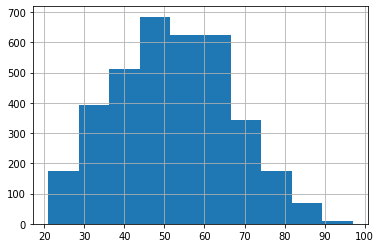

In [19]:
# report for age
df['age'].hist()



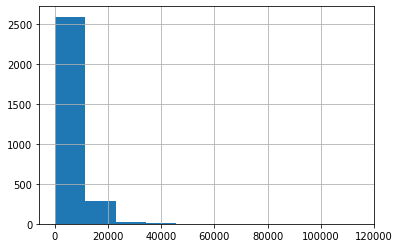

In [18]:
# report for MonthlyIncome

df['MonthlyIncome'].hist()



In [0]:
# merge both reports



In [0]:
# pivot table



# arrange for final report



# export to csv




Quarter                         2014-1        2014-2        2014-3  \
Income Group                                                         
Group 1      Delinquency      0.082692      0.104207      0.094886   
             Income        1683.596795   1709.381877   1678.436743   
             Num loans     1560.000000   1545.000000   1486.000000   
Group 2      Delinquency      0.088301      0.084932      0.088118   
             Income        3838.567492   3832.727945   3832.210631   
             Num loans     3556.000000   3650.000000   3518.000000   
Group 3      Delinquency      0.054484      0.056326      0.058782   
             Income        6470.650570   6499.673648   6450.835689   
             Num loans     7103.000000   7066.000000   7145.000000   
Group 4      Delinquency      0.041543      0.046110      0.040517   
             Income       18130.696142  16482.202305  15837.686436   
             Num loans     1685.000000   1735.000000   1703.000000   

Quarter                         2014-4        2015-1        2015-2  \
Income Group                                                         
Group 1      Delinquency      0.101976      0.087270      0.102923   
             Income        1666.393244   1675.868110   1655.060292   
             Num loans     1569.000000   1524.000000   1642.000000   
Group 2      Delinquency      0.079920      0.085162      0.093519   
             Income        3845.432254   3834.719977   3830.233655   
             Num loans     3491.000000   3464.000000   3518.000000   
Group 3      Delinquency      0.056920      0.057347      0.059867   
             Income        6464.588867   6494.781455   6480.926798   
             Num loans     7168.000000   7010.000000   7049.000000   
Group 4      Delinquency      0.041593      0.042388      0.039414   
             Income       16990.752197  16240.778507  15663.829955   
             Num loans     1707.000000   1675.000000   1776.000000   

Quarter                         2015-3        2015-4  
Income Group                                          
Group 1      Delinquency      0.083499      0.096178  
             Income        1686.732273   1680.112824  
             Num loans     1509.000000   1622.000000  
Group 2      Delinquency      0.084371      0.090403  
             Income        3803.901521   3844.262031  
             Num loans     3615.000000   3595.000000  
Group 3      Delinquency      0.060669      0.062171  
             Income        6454.233236   6485.409859  
             Num loans     7203.000000   7222.000000  
Group 4      Delinquency      0.055911      0.039071  
             Income       15568.647641  16868.279728  
             Num loans     1717.000000   1766.000000

### 6. Graph

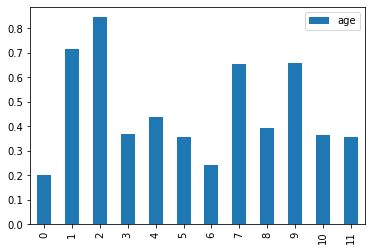

In [70]:
# bar plot

df.plot.bar(stacked=True)

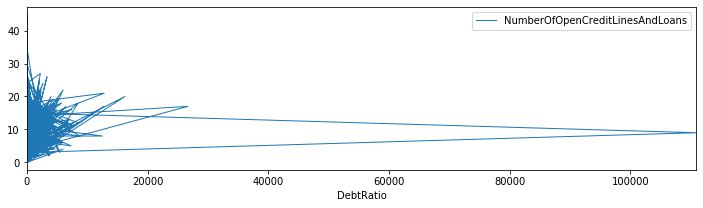

In [64]:

# line plot
df.plot.line(x='DebtRatio',y='NumberOfOpenCreditLinesAndLoans',figsize=(12,3),lw=1)

### 7. Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


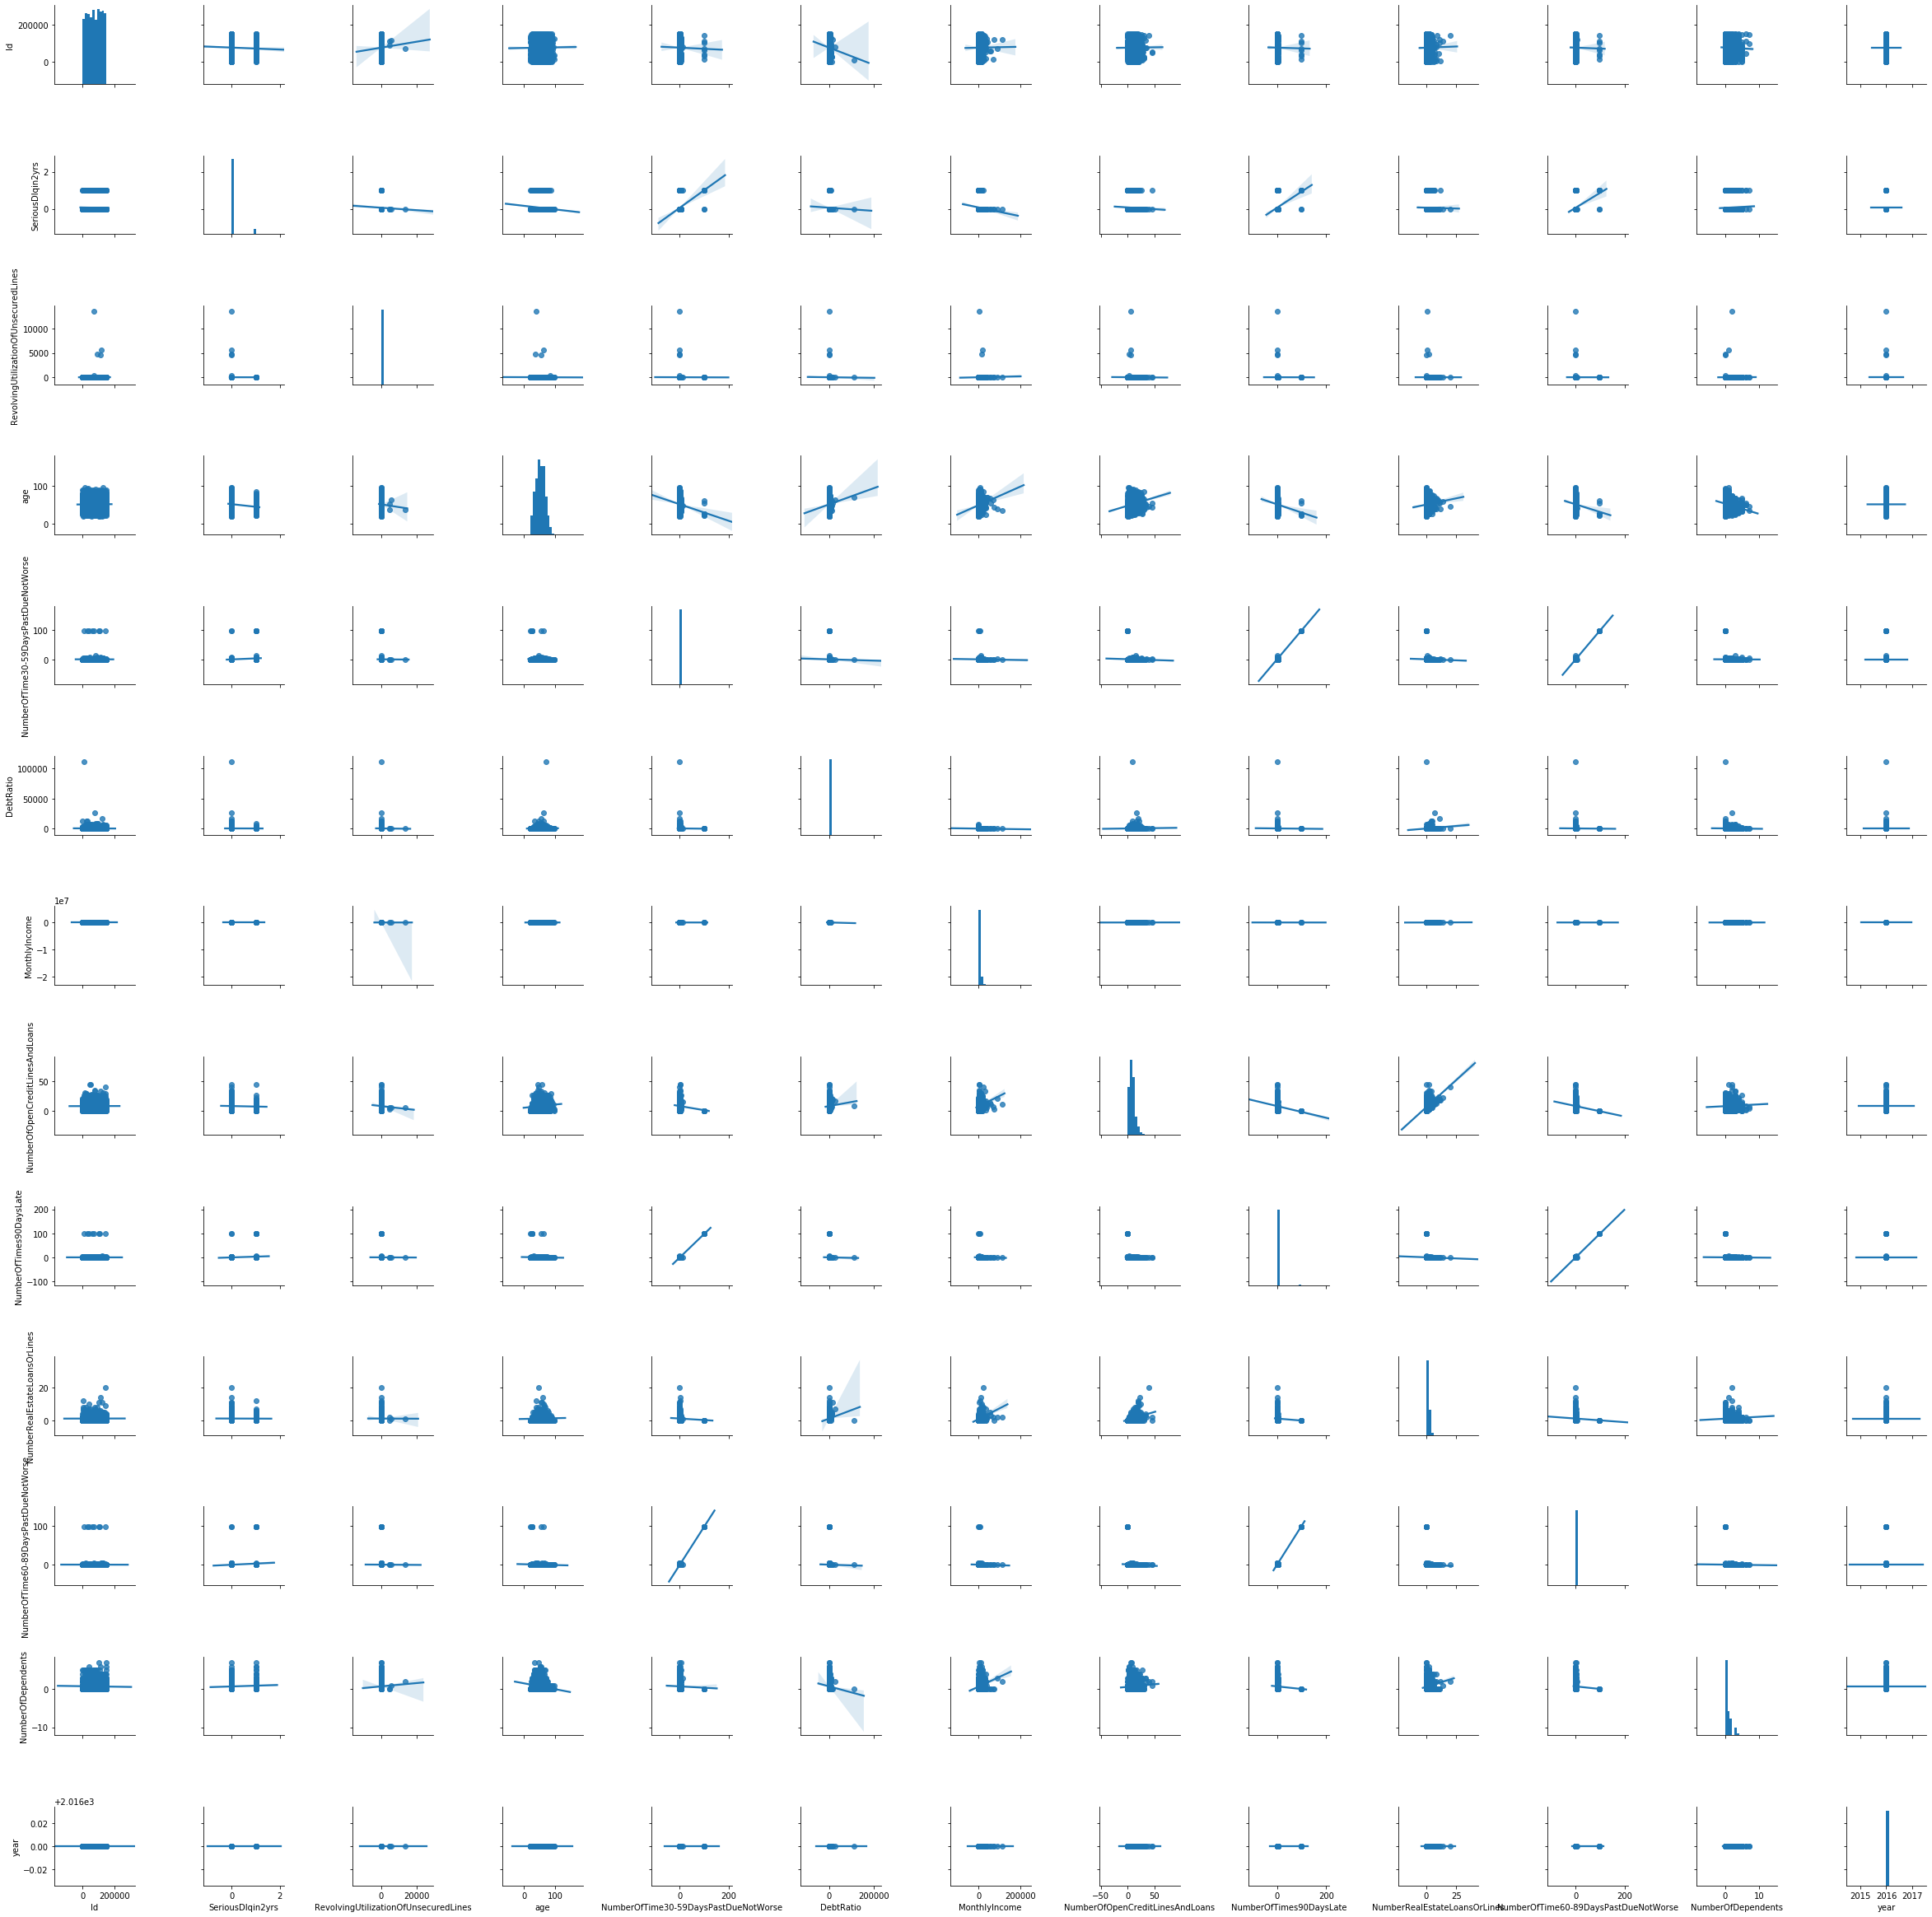

In [59]:
# Correlation plot
sns.pairplot(df, kind='reg')



/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in l

ZeroDivisionError: ignored

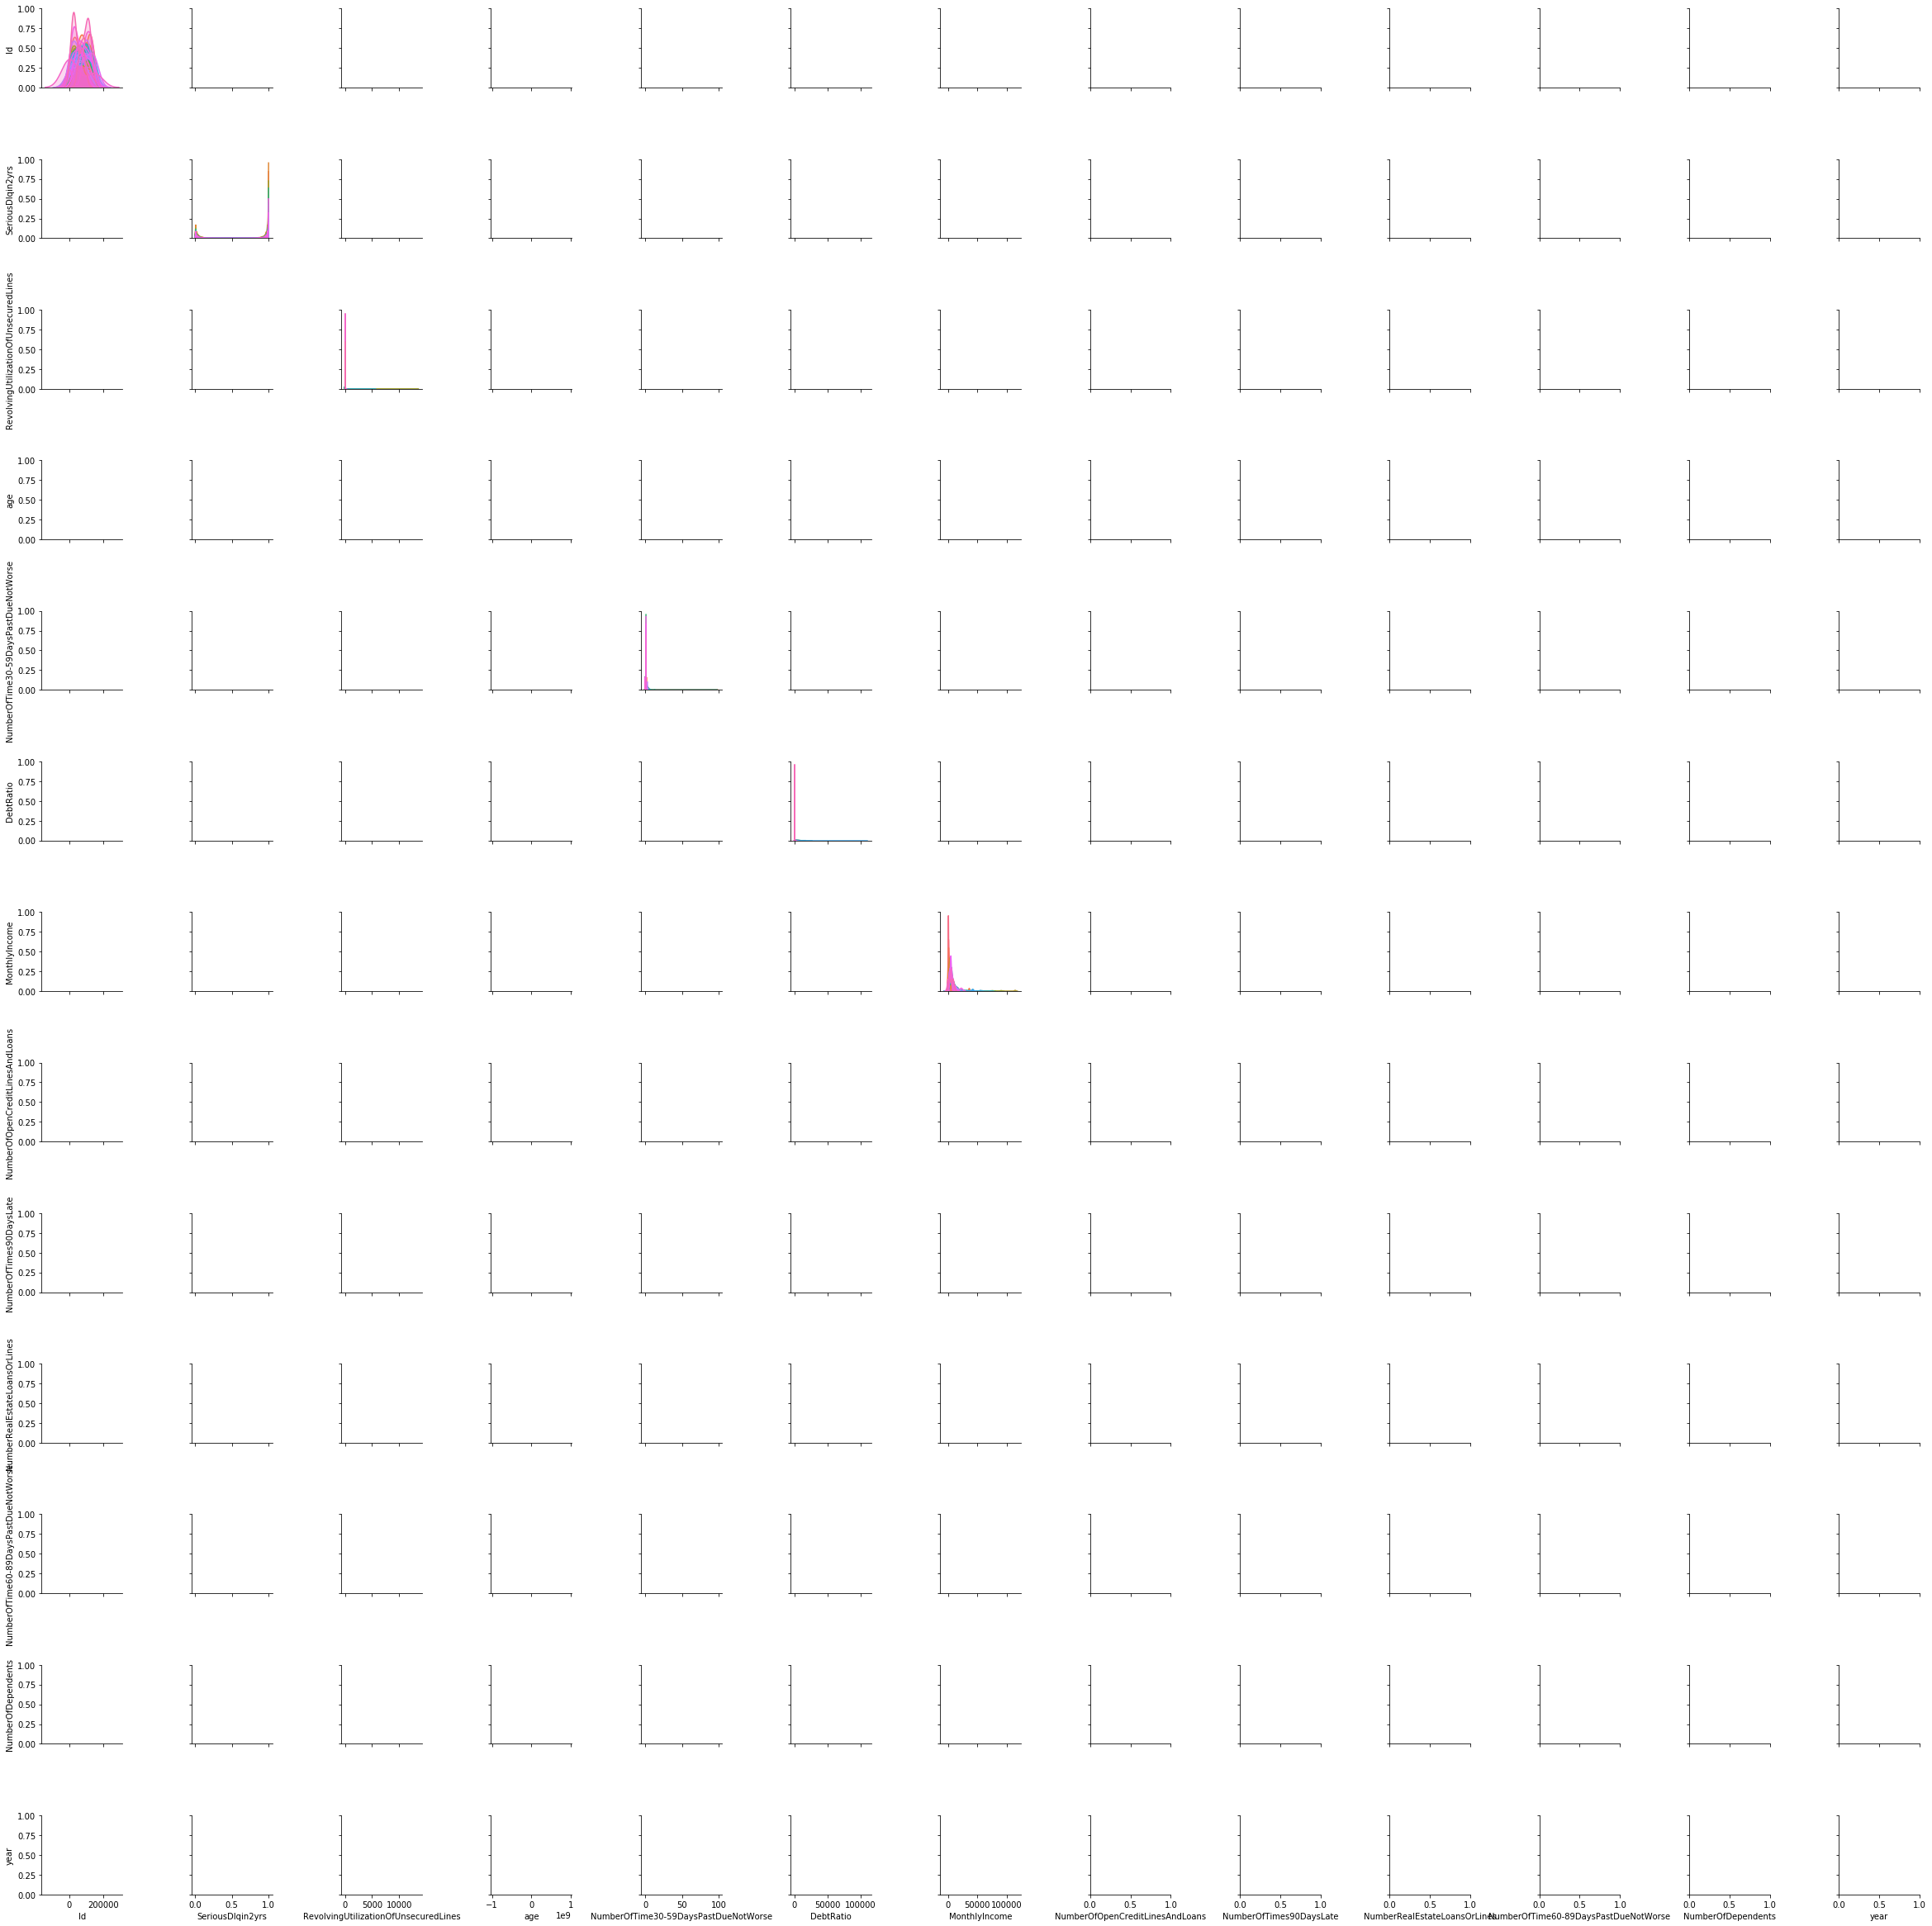

In [62]:
# Scatter plot with margins

sns.pairplot(df, kind='reg', hue="age")